In [16]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

np.set_printoptions(suppress=True)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

轨迹数据的 shape 为 [5907, 120, 4], 其中前 5000 条用于训练, 后 907 条用于测试

In [17]:
true_trajectories = np.load('./data/true_smooth_air_120.npy')

In [18]:
idx = 5000 + 55

Text(0, 0.5, 'Position-Y')

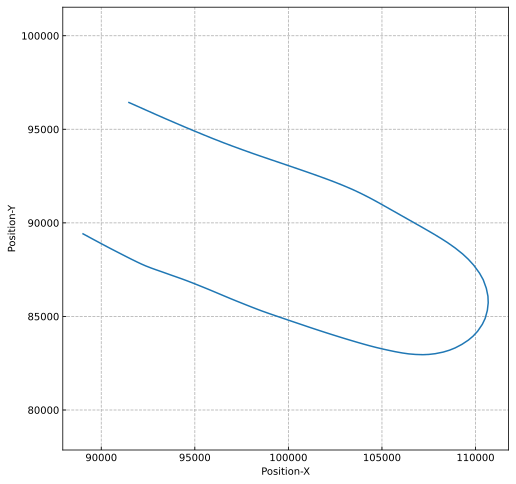

In [19]:
plt.figure(figsize=(8, 8))
plt.plot(true_trajectories[idx, :, 0], true_trajectories[idx, :, 1])
plt.axis('equal')
plt.grid(linestyle='--')
plt.xlabel('Position-X')
plt.ylabel('Position-Y')

In [20]:
def generate_measurement_trajectory(true_state_array: np.array, 
                                    azimuth_noise_std: float = 0.3, distance_noise_std: float = 150):
    
    meas_list = list()

    for i in range(true_state_array.shape[0]):
        true_pos  = true_state_array[i][:2]
        true_velo = true_state_array[i][2:]

        true_azimuth  = np.arctan2(true_pos[1], true_pos[0])
        true_distance = np.sqrt(np.square(true_pos[0]) + np.square(true_pos[1]))

        noise_azimuth  = true_azimuth  + np.random.normal(0, azimuth_noise_std * np.pi / 180)
        noise_distance = true_distance + np.random.normal(0, distance_noise_std)

        noise_pos_x = np.cos(noise_azimuth) * noise_distance
        noise_pos_y = np.sin(noise_azimuth) * noise_distance

        meas_point = np.array([noise_pos_x, noise_pos_y])
        meas_list.append(meas_point)

    return np.array(meas_list)

In [21]:
geneate_sample = generate_measurement_trajectory(true_trajectories[idx])

Text(0, 0.5, 'Position-Y')

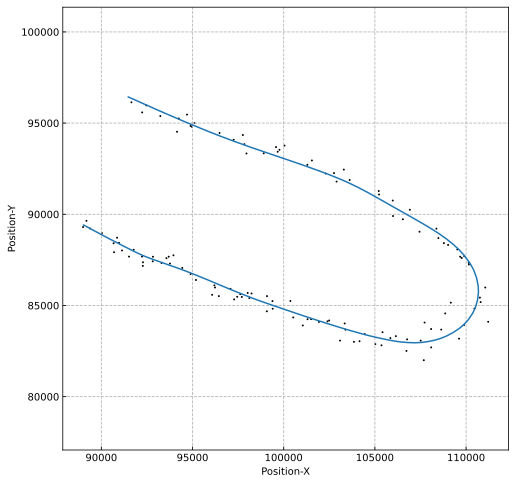

In [22]:
plt.figure(figsize=(8, 8))
plt.plot(true_trajectories[idx, :, 0], true_trajectories[idx, :, 1])
plt.scatter(geneate_sample[:, 0], geneate_sample[:, 1], s=1, c='black')
plt.axis('equal')
plt.grid(linestyle='--')
plt.xlabel('Position-X')
plt.ylabel('Position-Y')

# 生成添加了量测噪声的数据

In [23]:
# meas_list = list()

# for item in tqdm(true_trajectories):
#     meas_list.append(generate_measurement_trajectory(item))

# meas_array = np.array(meas_list)

In [24]:
# np.save('./data/meas_trajectories.npy', meas_array)

# 预测结果可视化

In [25]:
pred_result = np.load('./data/predict_result.npy')

In [26]:
target_array = pred_result[0]
output_array = pred_result[1]

In [27]:
test_idx = 55

In [28]:
geneate_sample = generate_measurement_trajectory(target_array[test_idx])

Text(0, 0.5, 'Position-Y')

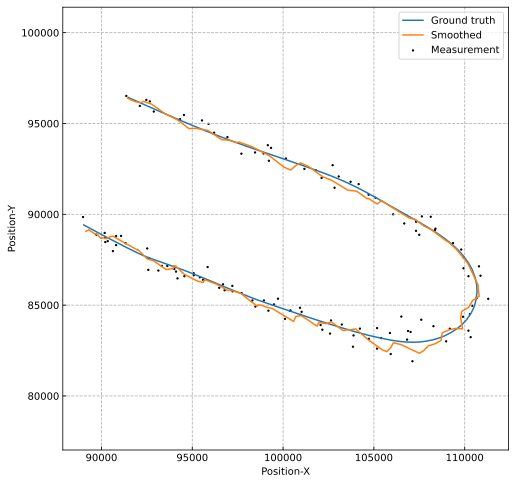

In [29]:
plt.figure(figsize=(8, 8))
plt.plot(target_array[test_idx, :, 0], target_array[test_idx, :, 1], label='Ground truth')
plt.plot(output_array[test_idx, :, 0], output_array[test_idx, :, 1], label='Smoothed')
plt.scatter(geneate_sample[:, 0], geneate_sample[:, 1], s=2, c='black', label='Measurement')
plt.axis('equal')
plt.grid(linestyle='--')
plt.legend()
plt.xlabel('Position-X')
plt.ylabel('Position-Y')